# Read Data + Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from itertools import combinations

In [ ]:
# Read in data
df = pd.read_csv('/content/drive/MyDrive/STA 160/heartdisease_healthindicators.csv')

# Preprocess data
# Transform diabetes to binary variable
df['Diabetes'] = df['Diabetes'].replace(2,1)

# Create singular Y column encoded with H, D, and S for the three response variables
df['HeartDiseaseorAttackH'] = df['HeartDiseaseorAttack'].replace([0,1],['O','H'])
df['DiabetesD'] = df['Diabetes'].replace([0,1],['O','D'])
df['StrokeS'] = df['Stroke'].replace([0,1],['O','S'])
df['Y'] = df['HeartDiseaseorAttackH']+df['DiabetesD']+df['StrokeS']

# Encode Y column to ordinal variable (levels 1 to 8)
df['Y_encoded'] = df['Y'].replace(['OOO','HOO','ODO','OOS','HDO','HOS','ODS','HDS'],[1,2,3,4,5,6,7,8])
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,DiffWalk,Sex,Age,Education,Income,HeartDiseaseorAttackH,DiabetesD,StrokeS,Y,Y_encoded
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,9.0,4.0,3.0,O,O,O,OOO,1
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,7.0,6.0,1.0,O,O,O,OOO,1
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,9.0,4.0,8.0,O,O,O,OOO,1
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,11.0,3.0,6.0,O,O,O,OOO,1
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,11.0,5.0,4.0,O,O,O,OOO,1


# EDA + Data Visualization

We split the variables into 3 categories for EDA:

Lifestyle (Niha):
*   Smoker
*   PhysActivity
*   Fruits
*   Veggies
*   HvyAlcoholConsump
*   DiffWalk

Health (Cindy):
*   HighBP
*   HighChol
*   CholCheck
*   BMI
*   GenHlth
*   MentHlth
*   PhysHlth

Demographic (JT):
*   AnyHealthcare
*   NoDocbcCost
*   Sex
*   Age
*   Education
*   Income

## Lifestyle Variables



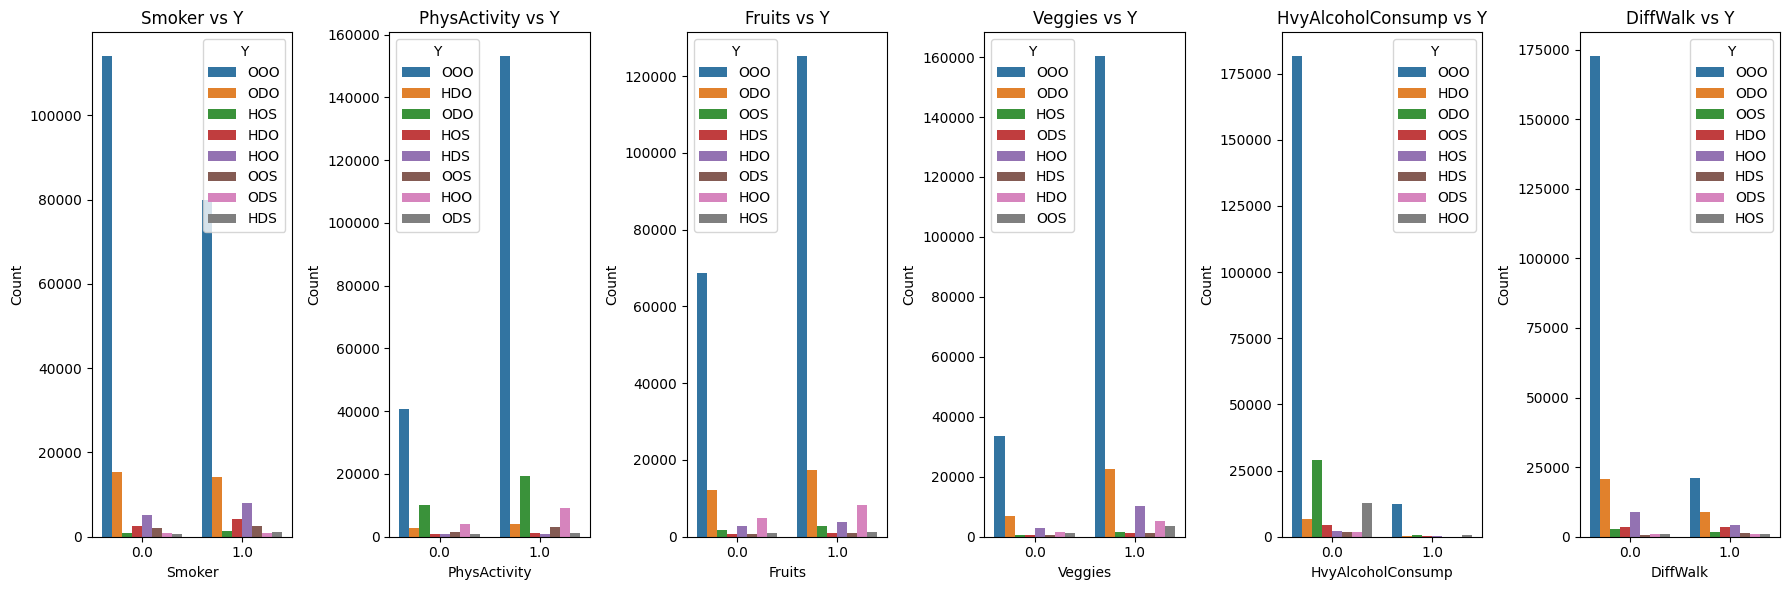

In [ ]:
# Plotting explanatory vs response countplots - NOT STACKED
response_variable = "Y"

explanatory_variables = ["Smoker", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "DiffWalk"]

def plot_explanatory_vs_response(df):
    num_explanatory = len(explanatory_variables)
    fig, axes = plt.subplots(nrows=1, ncols=num_explanatory, figsize=(18, 6))

    for i, expl_var in enumerate(explanatory_variables):
        sns.countplot(data=df, x=expl_var, hue=response_variable, ax=axes[i])
        axes[i].set_title(f'{expl_var} vs {response_variable}')
        axes[i].set_xlabel(expl_var)
        axes[i].set_ylabel('Count')
        axes[i].legend(title=response_variable)

    plt.tight_layout()
    plt.show()

plot_explanatory_vs_response(df)

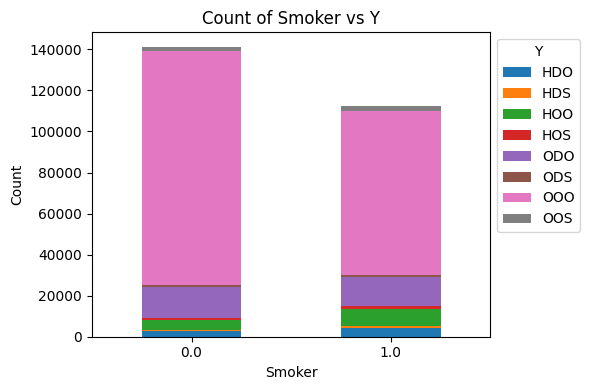

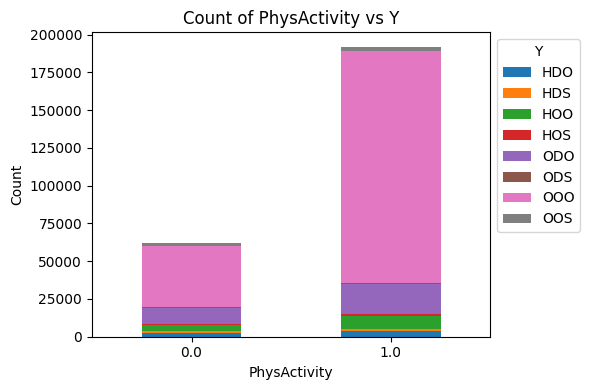

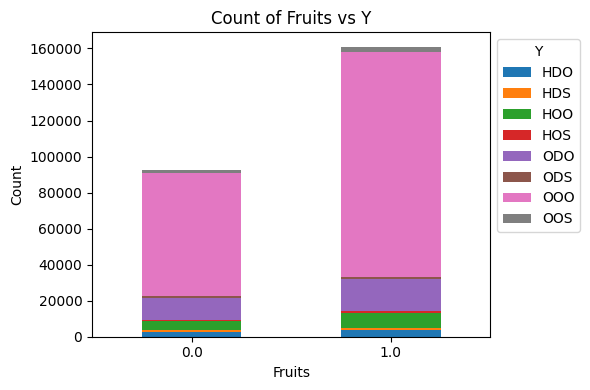

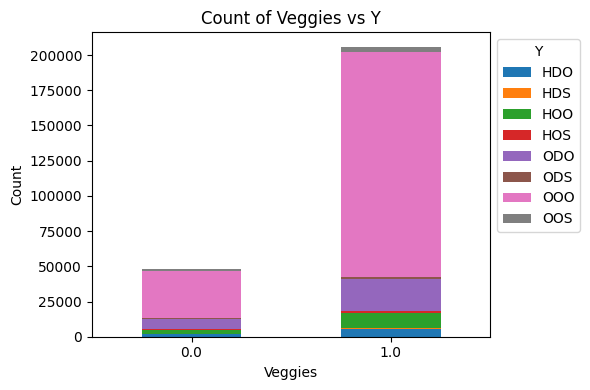

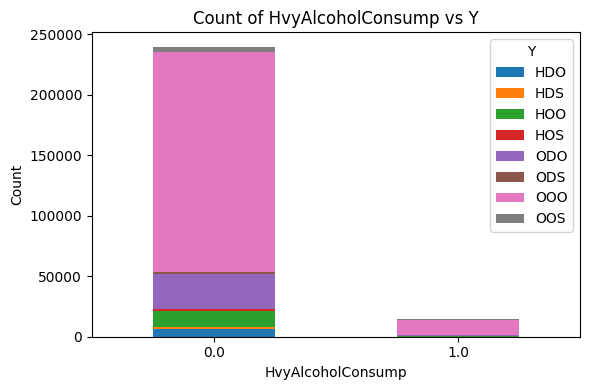

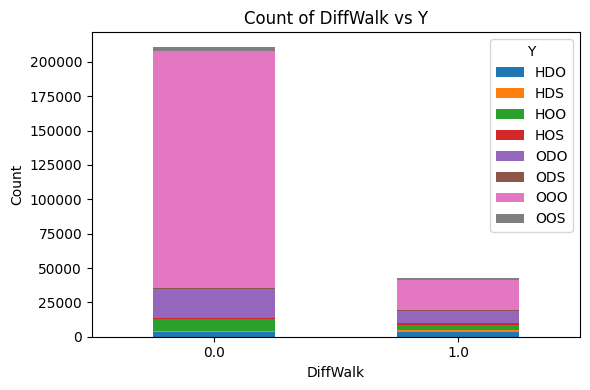

In [ ]:
# Plotting stacked countplots
for var in explanatory_variables:
    # Define explanatory variable
    explanatory_variable = var

    # Define response variable
    response_variable = "Y"

    # Get unique Y groups
    unique_y_groups = sorted(df['Y'].unique())

    # Set colors for each unique value of the response variable
    response_colors = sns.color_palette("tab10", n_colors=len(unique_y_groups))

    # Group data by explanatory variable and response variable, and count occurrences
    counts = df.groupby([explanatory_variable, response_variable])[response_variable].count().unstack().fillna(0)

    # Initialize figure and axes
    fig, ax = plt.subplots(figsize=(6, 4))

    # Plot stacked bars
    counts.plot(kind='bar', stacked=True, color=response_colors, ax=ax)

    # Set labels and legend
    ax.set_xlabel(explanatory_variable)
    ax.set_ylabel('Count')
    ax.legend(title=response_variable, bbox_to_anchor=(1, 1))
    ax.set_title('Count of '+explanatory_variable+' vs Y')

    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

## Health Variables

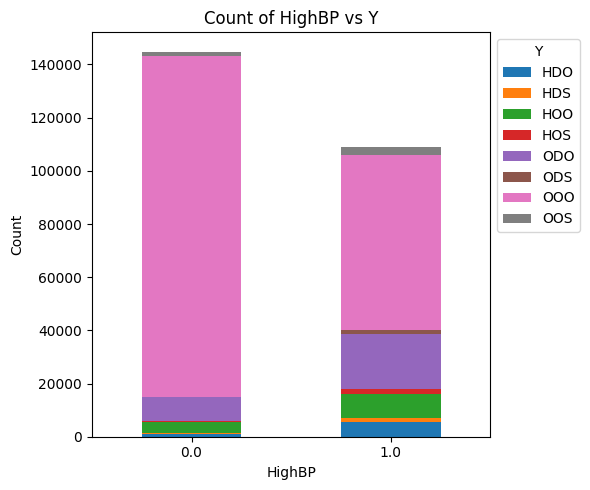

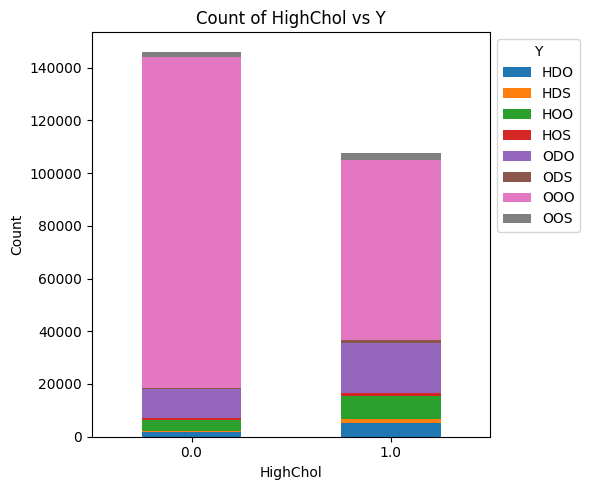

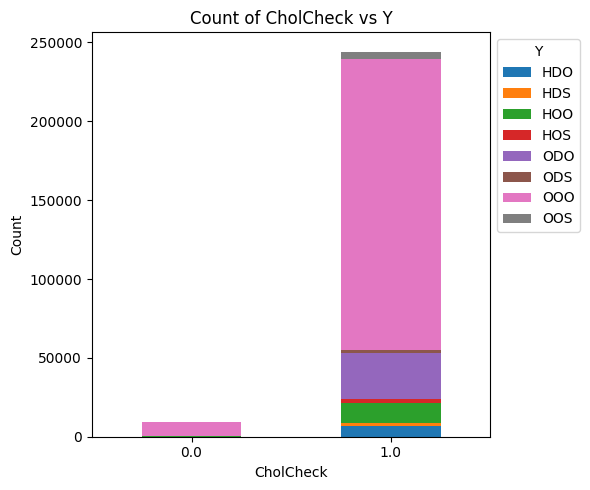

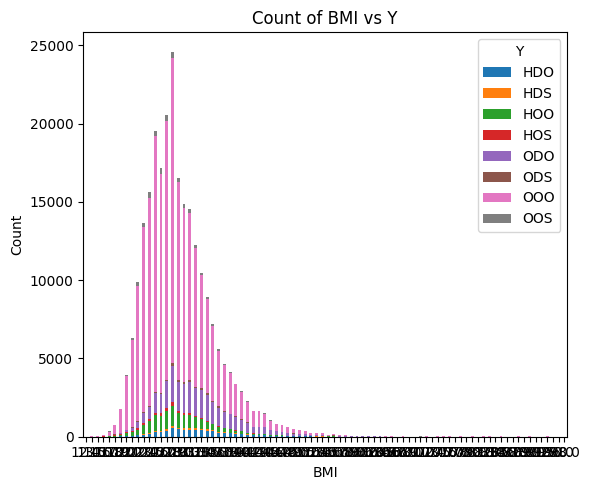

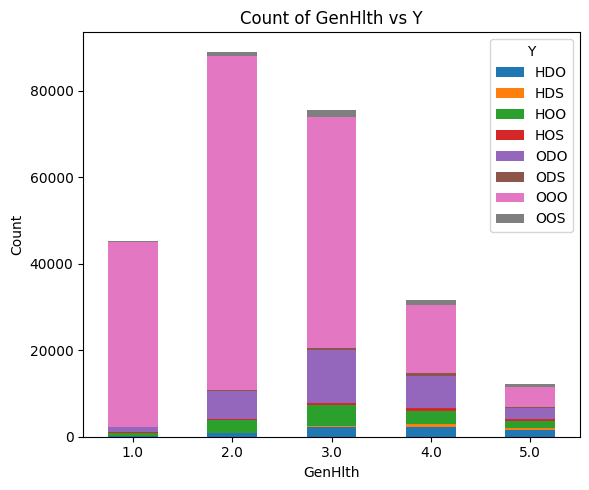

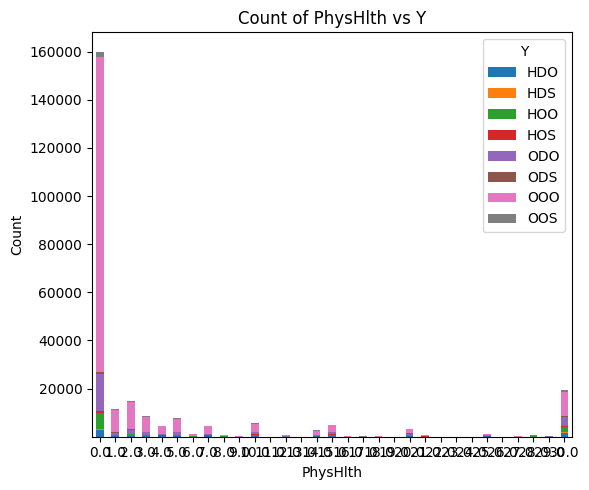

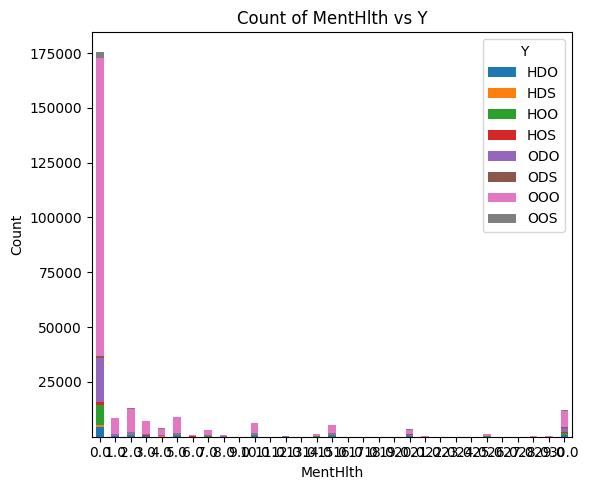

In [ ]:
# Plotting stacked countplots
for var in ['HighBP','HighChol','CholCheck','BMI','GenHlth','PhysHlth','MentHlth']:
    # Define explanatory variable
    explanatory_variable = var

    # Define response variable
    response_variable = "Y"

    # Get unique Y groups
    unique_y_groups = sorted(df['Y'].unique())

    # Set colors for each unique value of the response variable
    response_colors = sns.color_palette("tab10", n_colors=len(unique_y_groups))

    # Group data by explanatory variable and response variable, and count occurrences
    counts = df.groupby([explanatory_variable, response_variable])[response_variable].count().unstack().fillna(0)

    # Initialize figure and axes
    fig, ax = plt.subplots(figsize=(6, 5))

    # Plot stacked bars
    counts.plot(kind='bar', stacked=True, color=response_colors, ax=ax)

    # Set labels and legend
    ax.set_xlabel(explanatory_variable)
    ax.set_ylabel('Count')
    ax.legend(title=response_variable, bbox_to_anchor=(1, 1))
    ax.set_title('Count of '+explanatory_variable+' vs Y')

    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

## Demographic Variables

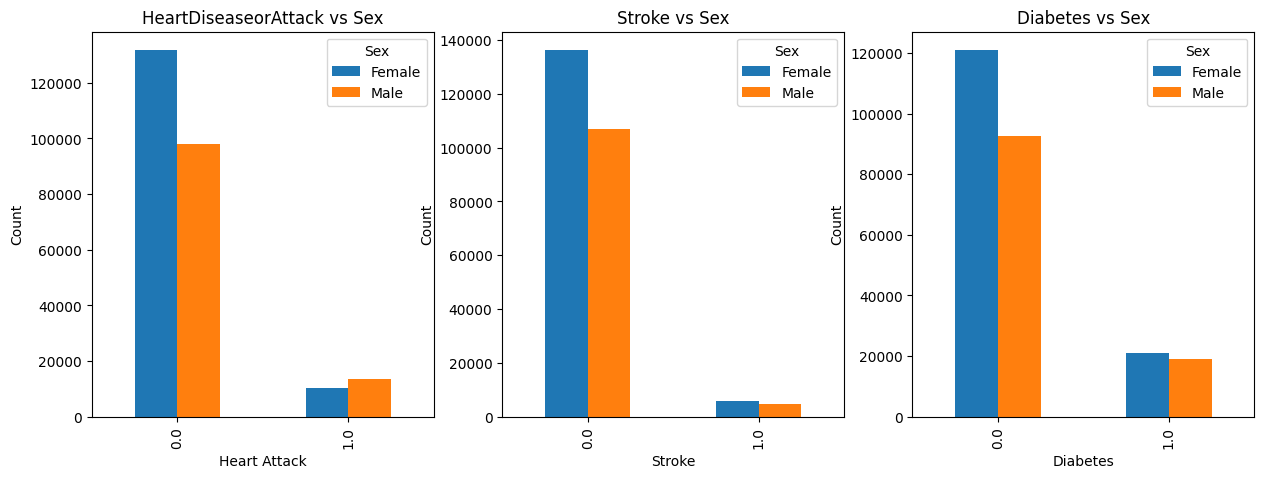

In [ ]:
# Creating Demographic Data Subset
demographic_data = df[['HeartDiseaseorAttack', 'Stroke', 'Diabetes',
'AnyHealthcare','NoDocbcCost', 'Sex', 'Age','Education', 'Income']]

# Getting Value Counts for HeartDiseaseorAttack vs Sex
sex_heartattack = demographic_data.groupby(['HeartDiseaseorAttack', 'Sex']).size().unstack(fill_value=0)
sex_stroke = demographic_data.groupby(['Stroke', 'Sex']).size().unstack(fill_value=0)
sex_diabetes = demographic_data.groupby(['Diabetes', 'Sex']).size().unstack(fill_value=0)

# Defining and Populating Plots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# HeartDiseaseorAttack
sex_heartattack.plot(kind='bar', ax=ax[0], stacked=False)
ax[0].set_title('HeartDiseaseorAttack vs Sex')
ax[0].set_xlabel('Heart Attack')
ax[0].set_ylabel('Count')
ax[0].legend(title='Sex', labels=['Female', 'Male'])

# Stroke
sex_stroke.plot(kind='bar', ax=ax[1], stacked=False)
ax[1].set_title('Stroke vs Sex')
ax[1].set_xlabel('Stroke')
ax[1].set_ylabel('Count')
ax[1].legend(title='Sex', labels=['Female', 'Male'])

# Diabetes
sex_diabetes.plot(kind='bar', ax=ax[2], stacked=False)
ax[2].set_title('Diabetes vs Sex')
ax[2].set_xlabel('Diabetes')
ax[2].set_ylabel('Count')
ax[2].legend(title='Sex', labels=['Female', 'Male'])
plt.show()

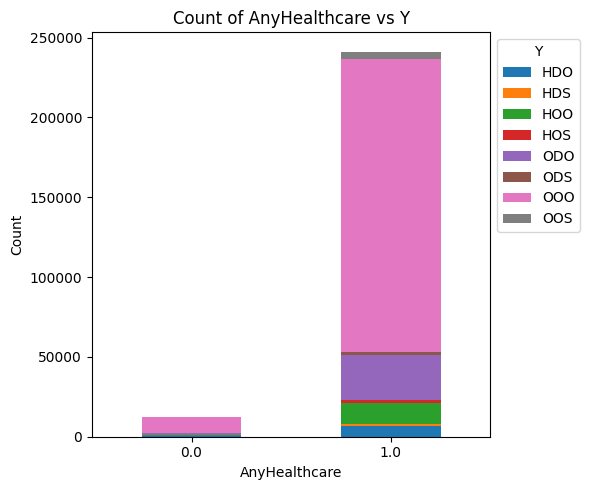

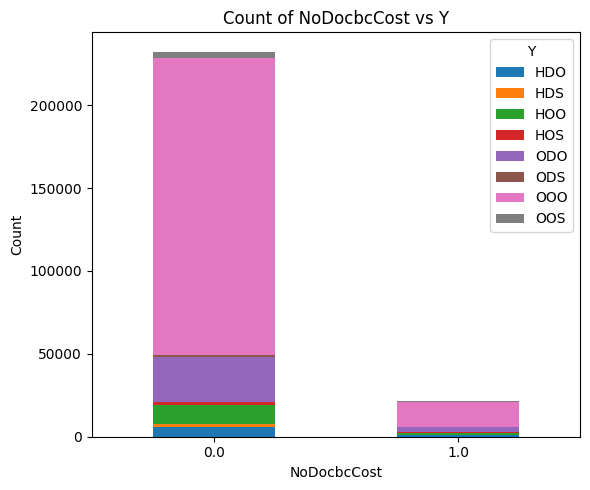

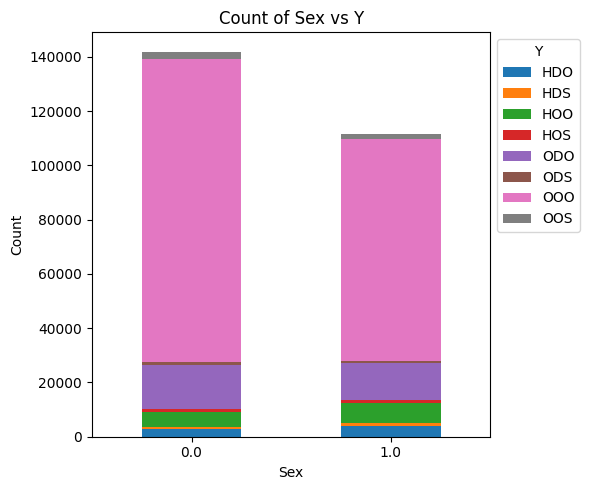

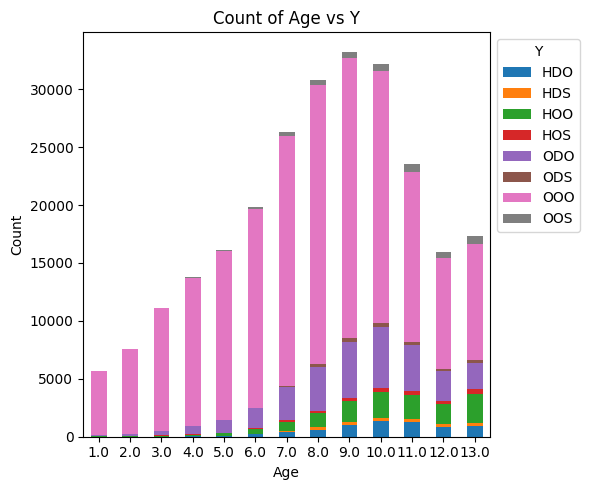

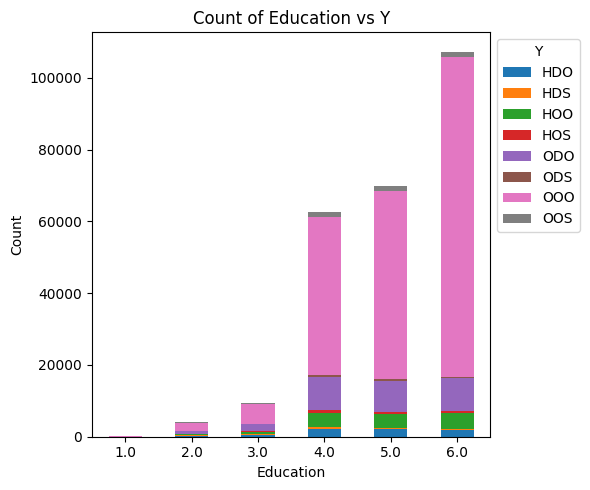

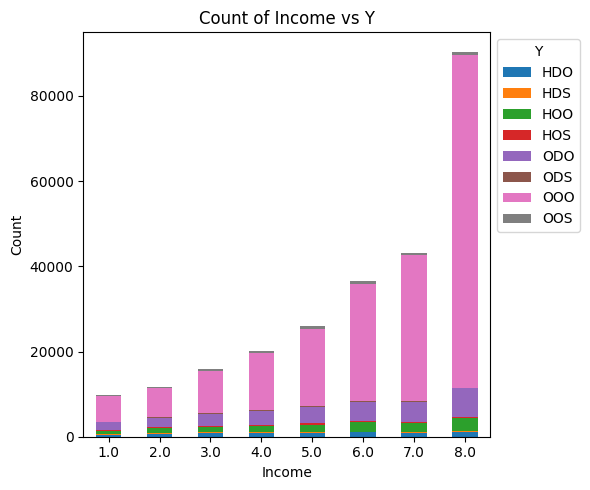

In [ ]:
# Plotting stacked countplots
for var in ['AnyHealthcare','NoDocbcCost', 'Sex', 'Age','Education', 'Income']:
    # Define explanatory variable
    explanatory_variable = var

    # Define response variable
    response_variable = "Y"

    # Get unique Y groups
    unique_y_groups = sorted(df['Y'].unique())

    # Set colors for each unique value of the response variable
    response_colors = sns.color_palette("tab10", n_colors=len(unique_y_groups))

    # Group data by explanatory variable and response variable, and count occurrences
    counts = df.groupby([explanatory_variable, response_variable])[response_variable].count().unstack().fillna(0)

    # Initialize figure and axes
    fig, ax = plt.subplots(figsize=(6, 5))

    # Plot stacked bars
    counts.plot(kind='bar', stacked=True, color=response_colors, ax=ax)

    # Set labels and legend
    ax.set_xlabel(explanatory_variable)
    ax.set_ylabel('Count')
    ax.legend(title=response_variable, bbox_to_anchor=(1, 1))
    ax.set_title('Count of '+explanatory_variable+' vs Y')

    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Odds

In [ ]:
def odds_calculation(condition, predictor):
    '''
    Calculates odds given one response and predictor variable
    '''
    cross_table = pd.crosstab(df[condition], df[predictor])
    odds = cross_table.iloc[1] / cross_table.iloc[0]
    ratio = odds.iloc[1] / odds.iloc[0]
    print(f'Odds ratio for {condition} vs {predictor} is {ratio}')

# Heart Disease/Attack odds
explanatory_variables = ['HighBP','HighChol','CholCheck','Smoker','PhysActivity','Fruits','Veggies','HvyAlcoholConsump',
          'AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']

for var in explanatory_variables:
  odds_calculation('HeartDiseaseorAttack',var)

Odds ratio for HeartDiseaseorAttack vs HighBP is 4.592098602559366
Odds ratio for HeartDiseaseorAttack vs HighChol is 3.589072560484596
Odds ratio for HeartDiseaseorAttack vs CholCheck is 3.63501418583555
Odds ratio for HeartDiseaseorAttack vs Smoker is 2.2039431659792883
Odds ratio for HeartDiseaseorAttack vs PhysActivity is 0.5359803822592469
Odds ratio for HeartDiseaseorAttack vs Fruits is 0.8704709000609268
Odds ratio for HeartDiseaseorAttack vs Veggies is 0.7278449279033655
Odds ratio for HeartDiseaseorAttack vs HvyAlcoholConsump is 0.5938410943412054
Odds ratio for HeartDiseaseorAttack vs AnyHealthcare is 1.4001593784760846
Odds ratio for HeartDiseaseorAttack vs NoDocbcCost is 1.4071459773084476
Odds ratio for HeartDiseaseorAttack vs GenHlth is 2.1178195809002385
Odds ratio for HeartDiseaseorAttack vs MentHlth is 0.6225917810221087
Odds ratio for HeartDiseaseorAttack vs PhysHlth is 0.8131437246696326
Odds ratio for HeartDiseaseorAttack vs DiffWalk is 4.266085291276664
Odds ratio 

# TA Helper Functions (Entropy + Concat Var)

In [ ]:
# Helper functions from TA starter code
##Entropy
def entropy(Y):
    """
    Also known as Shanon Entropy
    Reference: https://en.wikipedia.org/wiki/Entropy_(information_theory)
    Args: Y -> A 1D vector/array
    Return: en -> The entropy of the input Y
    """
    unique, count = np.unique(Y, return_counts=True, axis=0)
    prob = count/len(Y)
    en = np.sum((-1)*prob*np.log(prob))
    return en


#Joint Entropy
def jEntropy(Y,X):
    """
    H(Y;X)
    Reference: https://en.wikipedia.org/wiki/Joint_entropy
    Args: Y & X -> Two 1D vectors/arrays
    Return: entropy of a new variable YX, derived from concatenating Y and X
    """
    YX = np.c_[Y,X]
    return entropy(YX)

#Conditional Entropy
def cEntropy(Y, X):
    """
    conditional entropy = Joint Entropy - Entropy of X
    H(Y|X) = H(Y;X) - H(X)
    Reference: https://en.wikipedia.org/wiki/Conditional_entropy
    """
    return jEntropy(Y, X) - entropy(X)


#Information Gain
def gain(Y, X):
    """
    Information Gain, I(Y;X) = H(Y) - H(Y|X)
    Reference: https://en.wikipedia.org/wiki/Information_gain_in_decision_trees#Formal_definition
    """
    return entropy(Y) - cEntropy(Y,X)

In [ ]:
# Helper function from TA start code to concatenate two variables into single variable
def concat_var(df, vars, new_var_name = ''):
    """
    Combine multiple categorical variables into a single variable

    Args: df -> dataframe containing the variables to be concatenated
          vars -> list of variables to be concatenated
          new_var_name -> the name of the newly created variable from the cacatenation process
    Return: df -> df with an addition column containing the newly created variable
    """
    if new_var_name == '':
        new_var_name = '|'.join(vars)
    df_ = df.copy()
    new_vars =  np.c_[df_[vars]]
    df_[new_var_name] = ["|".join(item) for item in new_vars.astype('str')]

    return df_

# CE + MI for individual X against Y

In [ ]:
explanatory_variables = ['HighBP','HighChol','CholCheck','Smoker','PhysActivity','Fruits','Veggies','HvyAlcoholConsump',
          'AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income','BMI']

# Calculate conditional entropy and mutual information
CE_MI_results = []
for var in explanatory_variables:
    CE = cEntropy(df['Y_encoded'], df[var])
    MI = gain(df['Y_encoded'], df[var])
    CE_MI_results.append([var, CE, MI])

# Create a DataFrame for the results
CE_MI_df = pd.DataFrame(CE_MI_results, columns=['Variable', 'Conditional Entropy', 'Mutual Information'])
CE_MI_df.sort_values('Mutual Information', ascending=False, inplace=True)

CE_MI_df

,Variable,Conditional Entropy,Mutual Information
10,GenHlth,0.812253,0.077370
0,HighBP,0.833197,0.056426
15,Age,0.838733,0.050890
13,DiffWalk,0.849829,0.039794
1,HighChol,0.854058,0.035566
18,BMI,0.858100,0.031524
12,PhysHlth,0.859857,0.029766
17,Income,0.863214,0.026409
16,Education,0.876320,0.013304
4,PhysActivity,0.879614,0.010010


In [ ]:
# Plots to visualize the conditional entropy and mutual information

# Create trace for CE
ce_trace = go.Bar(x=CE_MI_df['Variable'], y=CE_MI_df['Conditional Entropy'], name='Conditional Entropy', marker_color='blue')

# Create the figure
fig = go.Figure(data=[ce_trace])

# Update layout
fig.update_layout(
    title='Conditional Entropy for Explanatory Variables',
    xaxis_title='Explanatory Variable',
    yaxis_title='Conditional Entropy',
)

# Show the plot
fig.show()

# Create trace for MI
mi_trace = go.Bar(x=CE_MI_df['Variable'], y=CE_MI_df['Mutual Information'], name='Mutual Information', marker_color='green')

# Create the figure
fig = go.Figure(data=[mi_trace])

# Update layout
fig.update_layout(
    title='Mutual Information for Explanatory Variables',
    xaxis_title='Explanatory Variable',
    yaxis_title='Mutual Information',
)

# Show the plot
fig.show()

# CE + MI for paired X against Y

In [ ]:
# Taking top 8 most important X variables from above analysis

impt_variables = ['GenHlth','HighBP','Age','DiffWalk','HighChol','BMI','PhysHlth','Income']

# Get all possible pairs of these 8 variables and concatenate them into a single variable
for combo in combinations(impt_variables, 2):
    df = concat_var(df,list(combo))

In [ ]:
# Create new data frame that only has the concatenated variables and our Y variable
concat_df = df.iloc[:,-30:]
concat_df.head()

,Y,Y_encoded,GenHlth|HighBP,GenHlth|Age,GenHlth|DiffWalk,GenHlth|HighChol,GenHlth|BMI,GenHlth|PhysHlth,GenHlth|Income,HighBP|Age,...,DiffWalk|HighChol,DiffWalk|BMI,DiffWalk|PhysHlth,DiffWalk|Income,HighChol|BMI,HighChol|PhysHlth,HighChol|Income,BMI|PhysHlth,BMI|Income,PhysHlth|Income
0,OOO,1,5.0|1.0,5.0|9.0,5.0|1.0,5.0|1.0,5.0|40.0,5.0|15.0,5.0|3.0,1.0|9.0,...,1.0|1.0,1.0|40.0,1.0|15.0,1.0|3.0,1.0|40.0,1.0|15.0,1.0|3.0,40.0|15.0,40.0|3.0,15.0|3.0
1,OOO,1,3.0|0.0,3.0|7.0,3.0|0.0,3.0|0.0,3.0|25.0,3.0|0.0,3.0|1.0,0.0|7.0,...,0.0|0.0,0.0|25.0,0.0|0.0,0.0|1.0,0.0|25.0,0.0|0.0,0.0|1.0,25.0|0.0,25.0|1.0,0.0|1.0
2,OOO,1,5.0|1.0,5.0|9.0,5.0|1.0,5.0|1.0,5.0|28.0,5.0|30.0,5.0|8.0,1.0|9.0,...,1.0|1.0,1.0|28.0,1.0|30.0,1.0|8.0,1.0|28.0,1.0|30.0,1.0|8.0,28.0|30.0,28.0|8.0,30.0|8.0
3,OOO,1,2.0|1.0,2.0|11.0,2.0|0.0,2.0|0.0,2.0|27.0,2.0|0.0,2.0|6.0,1.0|11.0,...,0.0|0.0,0.0|27.0,0.0|0.0,0.0|6.0,0.0|27.0,0.0|0.0,0.0|6.0,27.0|0.0,27.0|6.0,0.0|6.0
4,OOO,1,2.0|1.0,2.0|11.0,2.0|0.0,2.0|1.0,2.0|24.0,2.0|0.0,2.0|4.0,1.0|11.0,...,0.0|1.0,0.0|24.0,0.0|0.0,0.0|4.0,1.0|24.0,1.0|0.0,1.0|4.0,24.0|0.0,24.0|4.0,0.0|4.0


In [ ]:
# Calculate conditional entropy and mutual information for combined variables

explanatory_paired = concat_df.columns.values.tolist()[2:]

CE_MI_results = []
for var in explanatory_paired:
    CE = cEntropy(concat_df['Y_encoded'], concat_df[var].tolist())
    MI = gain(concat_df['Y_encoded'], concat_df[var].tolist())
    CE_MI_results.append([var, CE, MI])

# Create a DataFrame for the results
CE_MI_concat_df = pd.DataFrame(CE_MI_results, columns=['Variable', 'Conditional Entropy', 'Mutual Information'])
CE_MI_concat_df.sort_values('Mutual Information', ascending=False, inplace=True)

CE_MI_concat_df

,Variable,Conditional Entropy,Mutual Information
1,GenHlth|Age,0.768126,0.121497
0,GenHlth|HighBP,0.781224,0.108400
3,GenHlth|HighChol,0.790698,0.098925
4,GenHlth|BMI,0.791206,0.098417
15,Age|BMI,0.795841,0.093782
2,GenHlth|DiffWalk,0.803567,0.086056
7,HighBP|Age,0.804696,0.084928
6,GenHlth|Income,0.806044,0.083580
16,Age|PhysHlth,0.807283,0.082341
8,HighBP|DiffWalk,0.807535,0.082089


In [ ]:
# Plot conditional entropy and mutual information for combined variables

import plotly.graph_objects as go

# Create trace for CE
ce_trace = go.Bar(x=CE_MI_concat_df['Variable'], y=CE_MI_concat_df['Conditional Entropy'], name='Conditional Entropy', marker_color='blue')

# Create the figure
fig = go.Figure(data=[ce_trace])

# Update layout
fig.update_layout(
    title='Conditional Entropy for Explanatory Variables',
    xaxis_title='Explanatory Variable',
    yaxis_title='Conditional Entropy',
)

# Show the plot
fig.show()

# Create trace for MI
mi_trace = go.Bar(x=CE_MI_concat_df['Variable'], y=CE_MI_concat_df['Mutual Information'], name='Mutual Information', marker_color='green')

# Create the figure
fig = go.Figure(data=[mi_trace])

# Update layout
fig.update_layout(
    title='Mutual Information for Explanatory Variables',
    xaxis_title='Explanatory Variable',
    yaxis_title='Mutual Information',
)

# Show the plot
fig.show()

# Data visualization of paired X

In [ ]:
# Plot Age vs GenHlth
explanatory_variable = "Age"
response_variable = "GenHlth"

# Get unique Y groups
unique_y_groups = sorted(df['GenHlth'].unique())

# Set colors for each unique value of the response variable
response_colors = sns.color_palette("tab10", n_colors=len(unique_y_groups))

# Group data by explanatory variable and response variable, and count occurrences
counts = df.groupby([explanatory_variable, response_variable])[response_variable].count().unstack().fillna(0)

# Initialize figure and axes
fig, ax = plt.subplots(figsize=(6, 5))

# Plot stacked bars
counts.plot(kind='bar', stacked=True, color=response_colors, ax=ax)

# Set labels and legend
ax.set_xlabel(explanatory_variable)
ax.set_ylabel('Count')
ax.legend(title=response_variable, bbox_to_anchor=(1, 1))
ax.set_title('Age vs GenHlth')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Plot GenHlth vs HighBP
explanatory_variable = "GenHlth"
response_variable = "HighBP"

# Get unique Y groups
unique_y_groups = sorted(df['HighBP'].unique())

# Set colors for each unique value of the response variable
response_colors = sns.color_palette("tab10", n_colors=len(unique_y_groups))

# Group data by explanatory variable and response variable, and count occurrences
counts = df.groupby([explanatory_variable, response_variable])[response_variable].count().unstack().fillna(0)

# Initialize figure and axes
fig, ax = plt.subplots(figsize=(6, 5))

# Plot stacked bars
counts.plot(kind='bar', stacked=True, color=response_colors, ax=ax)

# Set labels and legend
ax.set_xlabel(explanatory_variable)
ax.set_ylabel('Count')
ax.legend(title=response_variable, bbox_to_anchor=(1, 1))
ax.set_title('GenHlth vs HighBP')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()